# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 11__

__Nombres de los estudiantes: Javier Gómez Moraleda y Mario Alcolea Alcolea__

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [1]:
import numpy as np
import pandas as pd

# Utilizamos el lector csv, cuyos valores aparecen separados por comas
df_orig = pd.read_csv('countries_of_the_world.csv', delimiter=',')

# Eliminamos la columna 'Region' utilizando la operación drop
df_orig = df_orig.drop(['Region'], axis=1)

# Eliminamos aquellas filas a las que les faltan valores
df_orig = df_orig.dropna()

# Mostramos la tabla resultante
df_orig

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
219,Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
224,Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


El dataframe original contenía 227 filas, es por ello que la última fila tiene como índice 226. Sin embargo, en el dataframe resultante sólo tiene 179 filas y esto se debe a que hemos eliminado todas aquellass filas que estaban incompletas en alguna de sus columnas. En cuanto a las columnas, el dataframe resultante tiene 19, entre las que se ecuentran el nombre del país, la población o el area entre otros. Además, hemos eliminado la columna 'Region'.

## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [2]:
# Realizo una copia del primer DataFrame
df = df_orig.copy()

# Guardo las columnas que me interesan en una lista
selected_cols = ['GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Agriculture', 'Industry', 'Service']

# Elimino todas las columnas excepto las que aparecen mencionadas en el enunciado
df = df_orig[selected_cols]

# Mostramos la tabla resultante
df

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
0,700.0,36.0,3.2,0.380,0.240,0.380
1,4500.0,86.5,71.2,0.232,0.188,0.579
2,6000.0,70.0,78.1,0.101,0.600,0.298
6,8600.0,95.0,460.0,0.040,0.180,0.780
7,11000.0,89.0,549.9,0.038,0.220,0.743
...,...,...,...,...,...,...
218,4800.0,93.4,140.1,0.040,0.419,0.541
219,2500.0,90.3,187.7,0.209,0.410,0.381
224,800.0,50.2,37.2,0.135,0.472,0.393
225,800.0,80.6,8.2,0.220,0.290,0.489


In [3]:
# Mostramos los datos estadísticos de cada variable numérica de la tabla
df.describe()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,9125.698324,81.944134,208.151955,0.156905,0.288028,0.554508
std,9644.123141,19.837537,210.121875,0.151343,0.140310,0.165670
min,500.000000,17.600000,0.200000,0.000000,0.032000,0.062000
25%,1800.000000,69.950000,27.100000,0.039000,0.197000,0.424500
50%,5100.000000,90.900000,137.100000,0.101000,0.274000,0.559000
75%,12950.000000,97.800000,335.000000,0.233000,0.349000,0.668500
max,37800.000000,100.000000,898.000000,0.769000,0.906000,0.954000


##### Ingresos per cápita (GDP)

<AxesSubplot:ylabel='Frequency'>

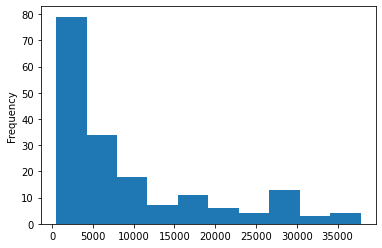

In [4]:
# Histograma del GDP
df['GDP ($ per capita)'].plot.hist()

El rango de la variable GDP oscila entre 500 y 37500 dólares. Como podemos ver en la gráfica, el pico de la frecuencia se encuentra entorno a 2500 dólares y su media en 9125.70 dólares.

##### Población alfabeta (Literacy) #####

<AxesSubplot:ylabel='Frequency'>

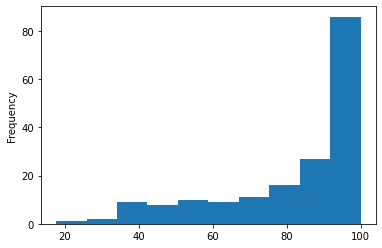

In [5]:
# Histograma de Literacy
df['Literacy (%)'].plot.hist()

El rango de la variable GDP oscila entre 15 y 100%. Como podemos ver en la gráfica, el pico de la frecuencia se encuentra entorno a 95% y su media en 81.94%.

##### Teléfonos por cada 1000 habitantes (Phones) #####

<AxesSubplot:ylabel='Frequency'>

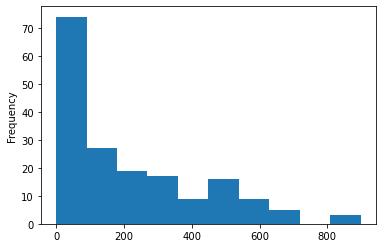

In [6]:
# Histograma de Phones
df['Phones (per 1000)'].plot.hist()

El rango de la variable GDP oscila entre 0 y 950. Como podemos ver en la gráfica, el pico de la frecuencia se encuentra entorno a 50 y su media en 208.15.

##### Agricultura (Agriculture) #####

<AxesSubplot:ylabel='Frequency'>

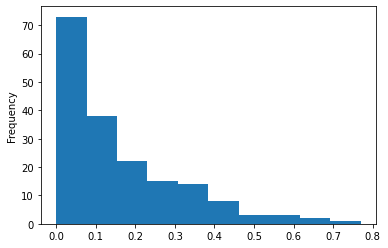

In [7]:
# Histograma del GDP
df['Agriculture'].plot.hist()

El rango de la variable GDP oscila entre 0.0 y 0.78. Como podemos ver en la gráfica, el pico de la frecuencia se encuentra entorno a 0.05 y su media en 0.157.

##### Industria (Industry) #####

<AxesSubplot:ylabel='Frequency'>

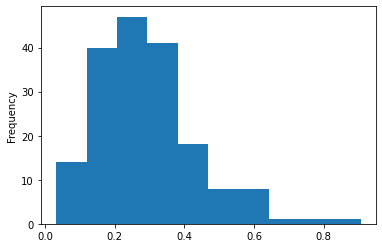

In [8]:
# Histograma del GDP
df['Industry'].plot.hist()

El rango de la variable GDP oscila entre 0.05 y 0.95. Como podemos ver en la gráfica, el pico de la frecuencia se encuentra entorno a 0.25 y su media en 0.288.

##### Servicios (Service) #####

<AxesSubplot:ylabel='Frequency'>

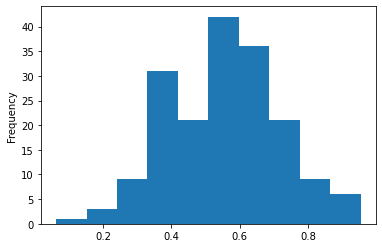

In [9]:
# Histograma del GDP
df['Service'].plot.hist()

El rango de la variable GDP oscila entre 0.05 y 0.95. Como podemos ver en la gráfica, el pico de la frecuencia se encuentra entorno a 0.55 y su media en 0.554.

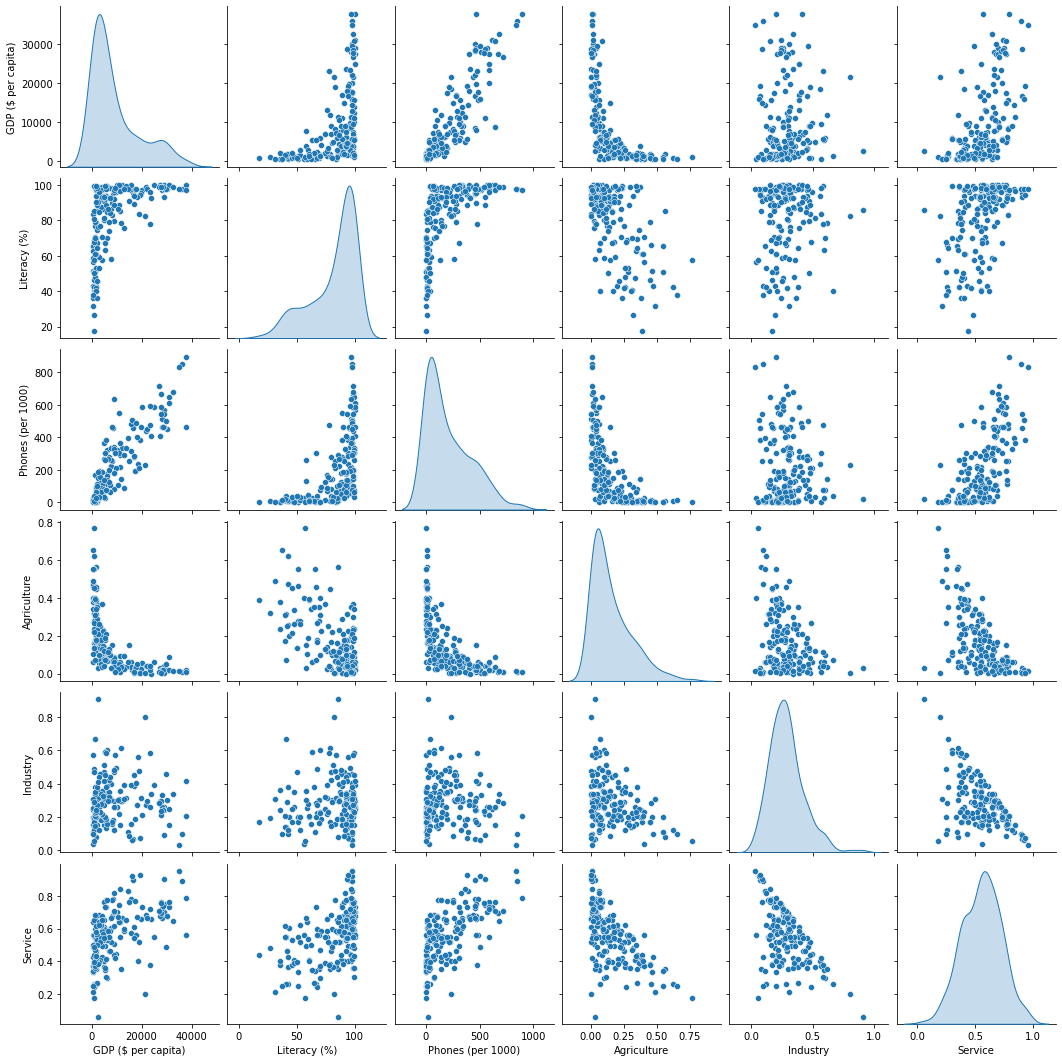

In [10]:
import seaborn as sns

# Mostramos los diagramas de las variables 2 a 2
sns.pairplot(df, diag_kind='kde')

#### GDP - Literacy ####
Vemos que Literacy alcanza valores máximos independientemente de GDP. En conclusión, el número de alfabetos no depende de GDP aunque cuanto más grande sea GDP menor es el número de analfabetos, hasta que incluso sea nulo.  
        
#### GDP - Phones ####
Podemos comprobar que a medida que aumenta el GDP, el valor de Phones también lo hace y crece linealmente respecto a GDP. Por lo tanto a mayor GDP más teléfonos.

#### GDP - Agriculture ####
Vemos que cuanto menor es GDP mayor es el valor de Agriculture, también podemos ver que a pesar de no aumentar casi el valor de GDP, el valor de Agriculture disminuye drásticamente. Donde concluimos que a mayor GDP menor es el uso de la agricultura.
       
#### GDP - Industry ####
La relación de los valores es dispersa y no hay una relación directa entre el aumento de valor de GDP y la Industry, pero el número de resultados se acumula en el valor máximo de GDP. Por lo que a mayor GDP, se distribuye el uso de industria en mayor o menor cantidad.

#### GDP - Service ####
A medida que aumentamos el GDP va aumentando el valor de Service, y tenemos un número acumulado de resultados cuando el valor de GDP es 0 y se va dispersando cada vez que aumenta.
  
#### Literacy - Phones ####
Podemos comprobar que hasta que el valor de Literacy no es el máximo donde el aumento del valor de Phones es muy grande, la gráfica se mantiene en valores mínimos salvo alguna excepción.
        
#### Literacy - Agriculture ####
Obtenemos unos resultados dispersos en los que a medida que aumenta el valor de Literacy disminuye el de la gráfica y donde en el valor máximo de Literacy se acumulan los valores mínimos.
         
#### Literacy - Industry ####
No tenemos una relación directa entre ambas variables ya que el valor de la gráfica se establece en un rango independientemente del valor de Literacy, aunque tenemos un número mayor de resultados en el valor máximo de Literacy.
        
#### Literacy - Service ####
Al contrario que con GDP, a medida que aumenta Literacy se acumulan resultados y aumentan su valor.
         
#### Phones - Agriculture ####
Comprobamos que cuando mayor es el uso de Agriculture menor es el número de teléfonos.
         
#### Phones - Industry ####
Podemos ver que tenemos un número mayor de resultados acumulado cuando el número de teléfonos es 0 o ligeramente mayor, y el rango de Industry es muy grande, por lo que no hay una correspondencia directa entre personas que tienen teléfono e Industry.
          
#### Phones - Service ####
Tenemos como resultado que a mayor número de teléfonos mayor es el valor de Service, aunque tenemos más resultados para un número menor de teléfonos.
         
#### Agriculture - Industry ####         
Comprobamos que cuanto mayor es la agricultura menor es la industria.
          
#### Agriculture - Service ####           
Como en el caso anterior, está directamente relacionado que cuando uno tiene mayor valor el otro desciende.

#### Industry - Service #### 
Vemos que la gráfica va en descenso a medida que mayor es Industry, teniendo una mayor acumulación de resultados en el valor medio.

##### Coeficientes de correlación de Pearson #####

In [11]:
# Coeficientes de correlación de Pearson
df.corr(method='pearson')

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
GDP ($ per capita),1.000000,0.522880,0.883520,-0.616919,0.032855,0.536551
Literacy (%),0.522880,1.000000,0.592042,-0.620514,0.105703,0.474395
Phones (per 1000),0.883520,0.592042,1.000000,-0.631578,-0.084247,0.649638
Agriculture,-0.616919,-0.620514,-0.631578,1.000000,-0.352785,-0.613489
Industry,0.032855,0.105703,-0.084247,-0.352785,1.000000,-0.521413
Service,0.536551,0.474395,0.649638,-0.613489,-0.521413,1.000000


Viendo la tabla con los coeficientes, nos encontramos con que muchas de las variables tienen unos valores cercanos al 1 o al -1, ya sea GDP con Phones o Agriculture con Phones, por lo que tienen correlación entre ellas y eso nos beneficia para la resolución del problema. También tenemos unos cuantos pares que son cercanos a 0 y no tendrían correlación entre si.

## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

#### Preprocesado ####
Debido a que cada columna tiene una unidad de medida distina con sus respectivas escalas, nos ha parecido razonable reescalar los datos utilizando MinMaxScaler, que convierte todos los datos al intervalo 0-1. De esta forma, creemos que podemos mejorar la eficiencia del algoritmo k-means, que sería sensible al comparar dólares del GDP frente al número de teléfonos, por ejemplo. Además, los valores no siguen distribuciones normales por lo que hemos decidido no estandarizarlos.

In [12]:
# Importamos MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Seleccionamos MinMaxScaler
scaler = MinMaxScaler()

# Accedemos al array interno del dataframe
scaler.fit(df.values)
df_array = scaler.transform(df.values)

# Transformamos el array obtenido de la transformación y creamos de nuevo el dataframe manteniendo el nombre de las columnas
df_scaled = pd.DataFrame(df_array, columns = df.columns.values)

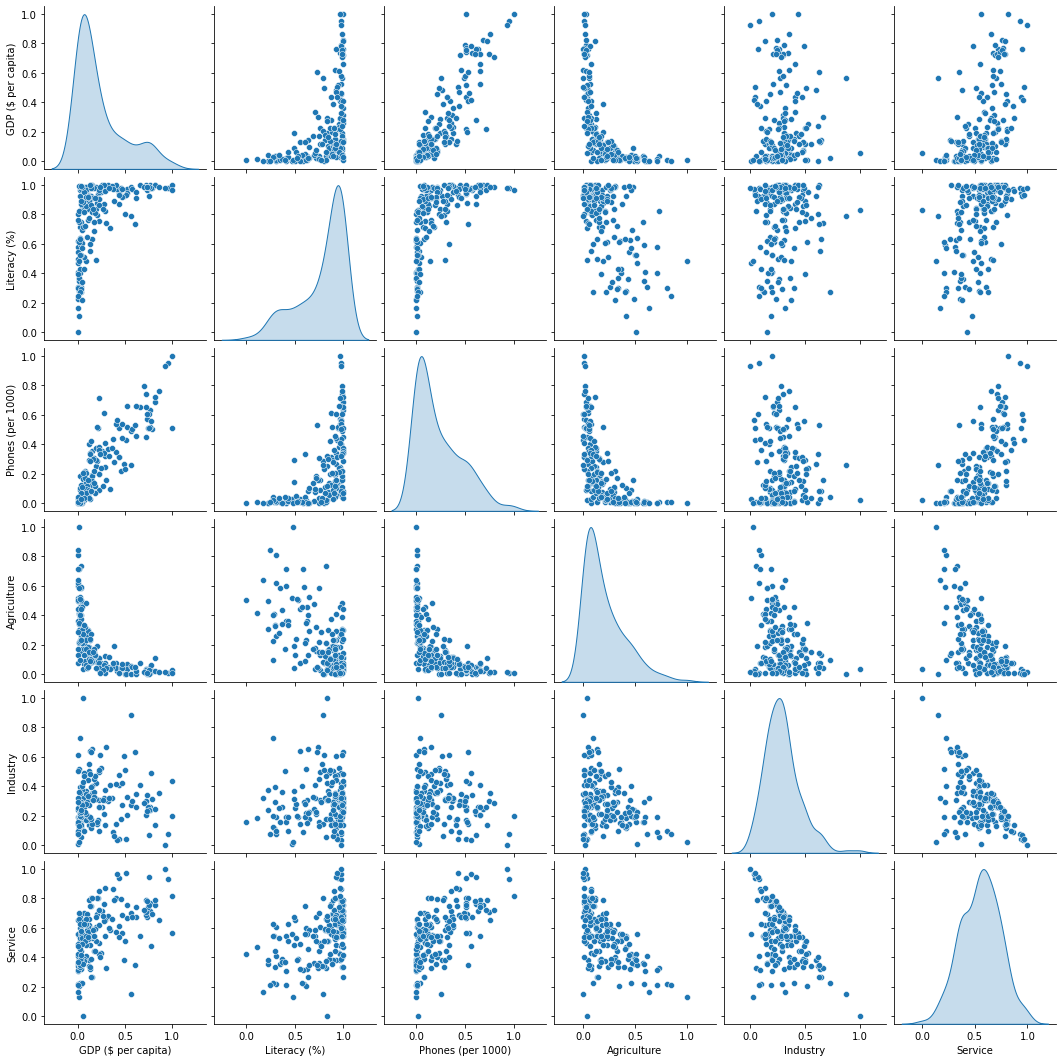

In [13]:
# Mostramos los diagramas de las variables 2 a 2
sns.pairplot(df_scaled,diag_kind='kde')

Como vemos, los valores de las gráficas ahora se encuentran entre 0 y 1, y el hecho de reescalar los datos no influye en absoluto a la distribución, por lo que la representaación sigue siendo exactamente la misma.

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

In [14]:
# Variable para controlar la aleatoriedad
RANDOM_STATE=333

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt

# Valor máximo de clusters, en nuestro caso será 10
K_MAX = 10

# Array donde almacenaremos las puntuaciones obtenidas de la suma de cada punto al centroide de su cluster
score = np.zeros(K_MAX-2)

# Array de puntuaciones utilizando Davies Boulding
davies_boulding = np.zeros(K_MAX-2)

# Array de puntuaciones utilizando Silhouette
silhouette = np.zeros(K_MAX-2)

# Bucle para calcular las puntuaciones para los distintos valores en el rango 2-10 de K
for k in range(2, K_MAX):
    
    # Creamos una instancia de KMeans
    km = KMeans(init='random', n_clusters=k, random_state=RANDOM_STATE)
    km.fit(df_scaled.values)
    
    # Calculamos las respectivas puntuaciones
    score[k-2] = -1 * km.score(df_scaled.values)
    davies_boulding[k-2] = davies_bouldin_score(df_scaled.values, km.labels_)
    silhouette[k-2] = silhouette_score(df_scaled.values, km.labels_)

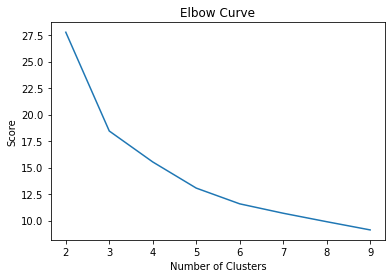

In [16]:
# Dibujamos el diagrama del codo
plt.plot(range(2, K_MAX), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Para el diagrama del codo nos interesa un valor en el que la gráfica deja de descender tan rápidamente, por lo que el número de clusters adecuado estaría entre 3 y 5.

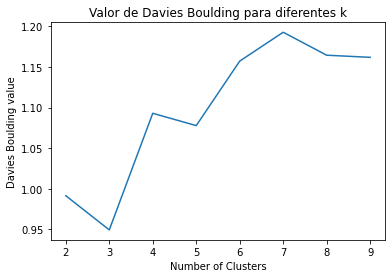

In [17]:
# Dibujamos el diagrama Davies Boulding
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()

Para el diagrama Davies Boulding nos interesa el valor mínimo de la gráfica, por lo que, sin ninguna duda tendríamos que elegir K = 3.

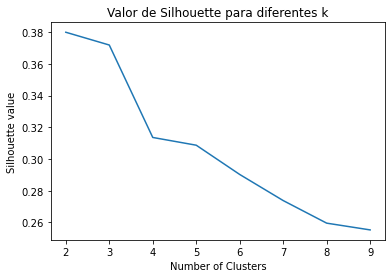

In [18]:
# Dibujamos el diagrama Silhouette
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette para diferentes k')
plt.show()

Para el diagrama Silhouette nos interesa un valor cercano a 1, por lo que para K = 2 es el valor que más próximo se encuentra.

Tras haber generado los 3 diagramas, todos nos han devuelto valores distintos y hemos considerado que el valor óptimo de clusters será K = 3, puesto que es un valor que se encuentra en el rango que hemos dado para el diagrama del codo, es exactamente el que nos da el de Davies Boulding y se encuentra 1 punto por encima del de Silhouette, pero consideramos que es el más equilibrado.

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

Vamos a ver los valores elegidos como centroides para cada cluster.

In [19]:
# Crear una instancia del agrupador k-means
km = KMeans(init='random', n_clusters=3, random_state=RANDOM_STATE)
km.fit(df_scaled.values)

# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
centers = km.cluster_centers_
centers

array([[0.6325067 , 0.96256068, 0.59030129, 0.03569571, 0.24439359,
        0.74515135],
       [0.16149901, 0.87767782, 0.1843625 , 0.15511393, 0.34652025,
        0.54128485],
       [0.02629628, 0.4367641 , 0.0188783 , 0.44307335, 0.22936852,
        0.40912127]])

Vamos a añadir una columna más a nuestro dataframe con el cluster al que pertenece cada fila. Para ello vamos a utilizar el dataframe sin escalar (pero sí con el preprocesado del ejercicio 1)

In [20]:
# Accedemos al dataframe original
df = pd.DataFrame(data=df.values, columns=df.columns.values)

# Añadimos una columna con el cluster al que pertenece cada punto
df = df.assign(cluster=pd.Series(data=km.labels_))

# Mostramos el dataframe resultante
df

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,cluster
0,700.0,36.0,3.2,0.380,0.240,0.380,2
1,4500.0,86.5,71.2,0.232,0.188,0.579,1
2,6000.0,70.0,78.1,0.101,0.600,0.298,1
3,8600.0,95.0,460.0,0.040,0.180,0.780,0
4,11000.0,89.0,549.9,0.038,0.220,0.743,0
...,...,...,...,...,...,...,...
174,4800.0,93.4,140.1,0.040,0.419,0.541,1
175,2500.0,90.3,187.7,0.209,0.410,0.381,1
176,800.0,50.2,37.2,0.135,0.472,0.393,2
177,800.0,80.6,8.2,0.220,0.290,0.489,1


Ahora vamos a ver una descripción estadística de cada columna en función del cluster al que pertenece.

In [21]:
# Mostramos la matriz transpuesta para que la info salga en vertical
df.groupby(["cluster"]).describe().transpose()

cluster                              0             1            2
GDP ($ per capita) count     40.000000     92.000000    47.000000
                   mean   24092.500000   6523.913043  1480.851064
                   std     7732.893030   4524.690981   816.311508
                   min     8600.000000    700.000000   500.000000
                   25%    17950.000000   3275.000000   800.000000
                   50%    25900.000000   5450.000000  1300.000000
                   75%    29025.000000   9000.000000  1850.000000
                   max    37800.000000  21500.000000  4100.000000
Literacy (%)       count     40.000000     92.000000    47.000000
                   mean      96.915000     89.920652    53.589362
                   std        3.872821      8.884504    14.501683
                   min       77.900000     58.000000    17.600000
                   25%       96.550000     85.025000    42.300000
                   50%       97.950000     92.250000    52.900000
                   75%       99.000000     97.350000    65.950000
                   max      100.000000     99.900000    85.300000
Phones (per 1000)  count     40.000000     92.000000    47.000000
                   mean     530.172500    165.720652    17.148936
                   std      138.167347    107.955035    23.621378
                   min      194.500000      3.700000     0.200000
                   25%      458.375000     75.075000     3.600000
                   50%      493.300000    141.500000     9.700000
                   75%      590.025000    260.525000    19.550000
                   max      898.000000    463.800000   131.800000
Agriculture        count     40.000000     92.000000    47.000000
                   mean       0.027450      0.119283     0.340723
                   std        0.019916      0.084219     0.149452
                   min        0.000000      0.002000     0.073000
                   25%        0.010750      0.058000     0.243500
                   50%        0.021500      0.099500     0.322000
                   75%        0.040000      0.164000     0.424500
                   max        0.086000      0.370000     0.769000
Industry           count     40.000000     92.000000    47.000000
                   mean       0.245600      0.334859     0.232468
                   std        0.115622      0.145356     0.118078
                   min        0.032000      0.088000     0.040000
                   25%        0.175000      0.229750     0.167500
                   50%        0.252000      0.311000     0.204000
                   75%        0.298000      0.412250     0.281500
                   max        0.585000      0.906000     0.666000
Service            count     40.000000     92.000000    47.000000
                   mean       0.726675      0.544826     0.426936
                   std        0.119561      0.134877     0.124527
                   min        0.375000      0.062000     0.177000
                   25%        0.671000      0.445000     0.351500
                   50%        0.729000      0.551500     0.406000
                   75%        0.780000      0.640750     0.542000
                   max        0.954000      0.818000     0.643000

Tras echar un vistazo rápido a estos detalles, si observamos la media, vemos que aparentemente ha separado bastante bien cada fila. Por ejemplo, en el PIB, las medias para cada cluster son 24092.5, 6523.9, 1480.8 respectivamente, pero llama mucho más la atención su desviación típica, ya que en el segundo cluster tiene un valor de 4524.6, lo cual es muchísimo para su media.
En el porcentaje de alfabetitzación vemos que las medias más bajas, tienen una desviación mucho mayor.
También en otros valores como el número de teléfonos por 1000 habitantes, el cluster 3 que tiene un valor de media muy bajo, tiene una desviación mayor que la misma, lo que indica que existen muchos valores alejados de la media.
Las otras tres variables siguen unos descriptores similares.

Para hacernos una idea del número de elementos que agrupa cada cluster, podemos observarlo con un gráfico en forma de tarta.

<AxesSubplot:ylabel='cluster'>

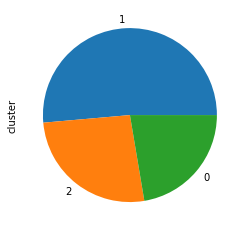

In [22]:
# Podemos dibujar el porcentaje de individuos perteneciente a cada clase
df['cluster'].value_counts().plot.pie()

En este caso vemos que más de la mitad de los individuos pertenecen al cluster 1 y que el 0 y 2 tienen un número parecido.

Por último, vamos a realizar el diagrama de dispersión con los individuos coloreados en función de su cluster.

array([[<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='GDP ($ per capita)'>,
        <AxesSubplot:xlabel='Literacy (%)', ylabel='GDP ($ per capita)'>,
        <AxesSubplot:xlabel='Phones (per 1000)', ylabel='GDP ($ per capita)'>,
        <AxesSubplot:xlabel='Agriculture', ylabel='GDP ($ per capita)'>,
        <AxesSubplot:xlabel='Industry', ylabel='GDP ($ per capita)'>,
        <AxesSubplot:xlabel='Service', ylabel='GDP ($ per capita)'>],
       [<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>,
        <AxesSubplot:xlabel='Literacy (%)', ylabel='Literacy (%)'>,
        <AxesSubplot:xlabel='Phones (per 1000)', ylabel='Literacy (%)'>,
        <AxesSubplot:xlabel='Agriculture', ylabel='Literacy (%)'>,
        <AxesSubplot:xlabel='Industry', ylabel='Literacy (%)'>,
        <AxesSubplot:xlabel='Service', ylabel='Literacy (%)'>],
       [<AxesSubplot:xlabel='GDP ($ per capita)', ylabel='Phones (per 1000)'>,
        <AxesSubplot:xlabel='Literacy (%)', ylabel='Phones (per 1

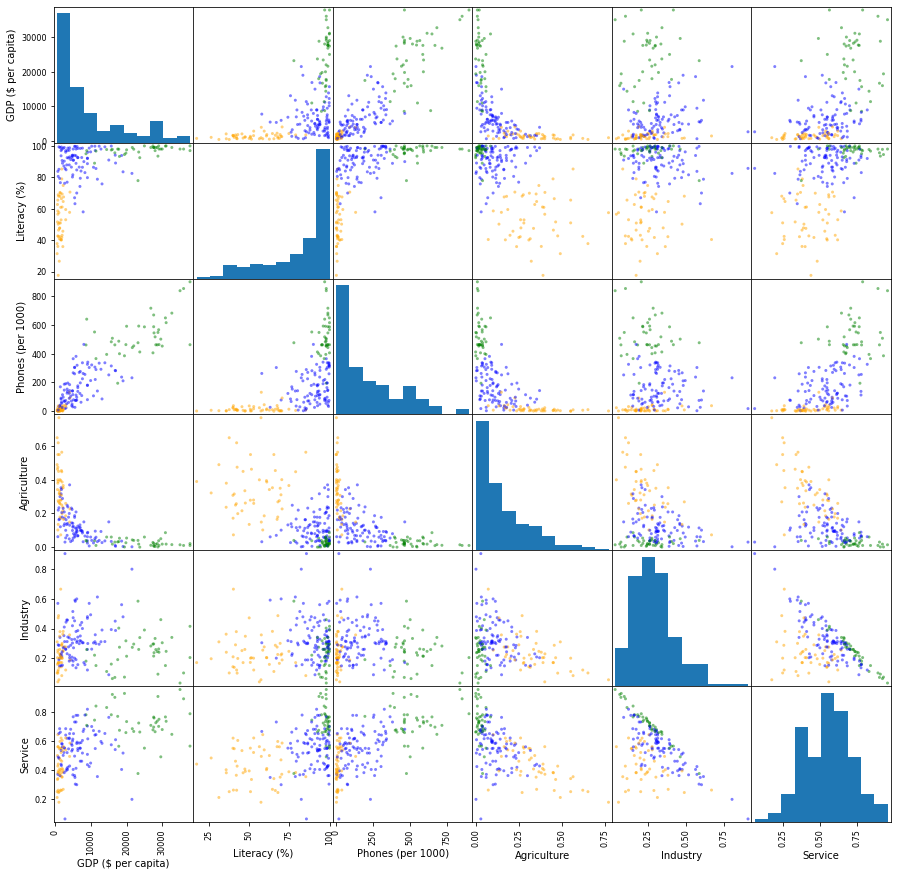

In [23]:
from pandas.plotting import scatter_matrix

# Asignamos el mismo color que en el gráfico de tarta a cada cluster
dic_colors = { 0: 'green', 1: 'blue', 2: 'orange'}
colors = df['cluster'].map(dic_colors)

# La seleccionamos como categórica para que no la incluya en el diagrama
df['cluster'] = df['cluster'].astype('category')

# Diagrama de dispersión
scatter_matrix(df, figsize = (15, 15), diagonal = 'hist', color = colors)

En casi todas las relaciones 2 a 2 de cada variables observamos una división relativamente clara. El color azul predomina en la mayoría de casos puesto que agrupa más del 50% de los individuos y a simple vista el color naranja suele ser el más disperso (salvo excepcioes como el PIB con los teléfonos), lo cual nos encaja con el análisis previo que hemos hecho con las medias y desviaciones.
Los pares de relaciones en los que podría haber confusión son algunos como la agricultura-alfabetización, industria-alfabetización y servicios-alfabetización, puesto que el color verde está muy próximo al azul e incluso muchos individuos están muy entremezclados perteneciendo a distintos clusters. Algo similar pasa con los teléfonos-PIB puesto que se observan muchos puntos azules sobre naranjas.
En cuanto al resto, se ve una diferenciación bastante y equilibrada y salvo los casos comentados, el algoritmo funciona bastante bien aparentemente.